# 1.

## (a) 最速下降

In [29]:
import numpy as np

A = np.array([[0.05, 0.07, 0.06, 0.05], [0.07, 0.1, 0.08, 0.07],
              [0.06, 0.08, 0.1, 0.09], [0.05, 0.07, 0.09, 0.1]])
b = np.array([[0.23], [0.32], [0.33], [0.31]])
x = np.zeros((4, 1))
r = np.ones((4,1))
epsilon = 1e-20

while sum(r ** 2)>epsilon:
    r = b - A @ x
    alpha = r.T @ r / (r.T @ A @ r)
    x += alpha * r
    r = r - alpha * A @ r

print(x)

[[0.99999928]
 [1.00000043]
 [1.00000018]
 [0.99999989]]


## (b) 共轭梯度算法

In [2]:
import copy

A = np.array([[0.05, 0.07, 0.06, 0.05], [0.07, 0.1, 0.08, 0.07],
              [0.06, 0.08, 0.1, 0.09], [0.05, 0.07, 0.09, 0.1]])
b = np.array([[0.23], [0.32], [0.33], [0.31]])
x = np.zeros((4, 1))
epsilon = 1e-12

r = b - A @ x
p = copy.deepcopy(r)
k = 0

while sum(r**2) > epsilon:
    alpha = (r.T @ p) / (p.T @ A @ p)
    x += alpha * p
    r1 = copy.deepcopy(r)
    r -= alpha * A @ p
    beta = (r.T @ r) / (r1.T @ r1)
    p = r + beta * p

x

array([[1.],
       [1.],
       [1.],
       [1.]])

# 2.

## QR algorithm
思路：
$$
T_0=A\\
T_k = Q_k R_k\\
T_{k+1}=R_k Q_k\\
$$

In [3]:
import numpy as np


def householder(x):
    y = np.zeros((len(x), 1))
    y[0] = np.linalg.norm(x)
    if x[0] > 0:
        w = x + y
    else:
        w = x - y
    R = np.eye(len(x)) - 2 * w @ w.T / np.linalg.norm(w)**2
    return R


def QR(T):
    n = len(T)
    R = T
    for i in range(n):
        x = R[i:, i].reshape((n-i, 1))
        P = np.block([[np.eye(i), np.zeros((i, n - i))],
                      [np.zeros((n - i, i)),
                       householder(x)]])
        R = P @ R
        if i == 0:
            Q = P
        else:
            Q = P @ Q
    return Q.T, R


def eig_QR(T, times):
    for i in range(times):
        Q, R = QR(T)
        T = R @ Q
        if i % 5 == 4:
            print('when k = {}, Tk : \n{}\n'.format((i // 5 + 1) * 5, T))
    return np.sort(np.diag(T))


times = 25
T = np.asmatrix([[1, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 3, -1], [0, 0, -1, 4]])

eig = eig_QR(T, times)
print('QR分解得特征值:', eig)

eig, _ = np.linalg.eig(T)
print('用np验算:', eig)

when k = 5, Tk : 
[[ 4.29276628e+00 -7.21313977e-01 -1.66533454e-16 -3.69983991e-16]
 [-7.21313977e-01  3.55611356e+00 -3.34967464e-01  2.27465616e-16]
 [ 1.44847270e-17 -3.34967464e-01  1.89640130e+00 -3.99652715e-04]
 [ 2.27264698e-20  8.03740369e-21 -3.99652715e-04  2.54718859e-01]]

when k = 10, Tk : 
[[ 4.73418406e+00 -1.31448547e-01 -3.76434994e-16 -4.21142860e-16]
 [-1.31448547e-01  3.18812610e+00 -1.85822775e-02 -2.64398787e-17]
 [ 1.76655749e-18 -1.85822775e-02  1.82297108e+00 -2.07643130e-08]
 [ 1.44007270e-25 -1.08954435e-24 -2.07643133e-08  2.54718760e-01]]

when k = 15, Tk : 
[[ 4.74507887e+00 -1.78120256e-02 -3.92711579e-16 -4.17992714e-16]
 [-1.78120256e-02  3.17748431e+00 -1.15075434e-03 -6.06231597e-17]
 [ 2.13796327e-21 -1.15075434e-03  1.82271806e+00 -1.10630676e-12]
 [ 9.28805395e-33 -7.92502392e-31 -1.10658664e-12  2.54718760e-01]]

when k = 20, Tk : 
[[ 4.74527757e+00 -2.39738535e-03 -3.93996396e-16 -4.17375589e-16]
 [-2.39738535e-03  3.17728658e+00 -7.14944440e-0

## Jacobi

In [4]:
import numpy as np
import scipy.linalg
import math


def givens(i, j, T):
    G = np.eye(len(T))
    eta = (-T[i, i] + T[j, j]) / (2 * T[i, j])
    if eta >= 0:
        t = -eta + np.sqrt(1 + eta**2)
    else:
        t = -eta - np.sqrt(1 + eta**2)
    c = 1 / np.sqrt(1 + eta**2)
    s = c * t
    norm = np.sqrt(c**2 + s**2)
    c = c / norm
    s = s / norm
    G[i, i] = c
    G[i, j] = s
    G[j, i] = -s
    G[j, j] = c
    return G


def eig_Jacobi(T):
    n = len(T)
    for time in range(times):
        for i in range(n):
            for j in range(i+1,n):
                if T[i, j] != 0:
                    G = givens(i, j, T)
                    T = G.T @ T @ G
                else:
                    pass
        if time % 5 == 4:
            print('when k = {}, Tk : \n{}\n'.format((time // 5 + 1) * 5, T))
    return np.sort(np.diag(T))


times = 25

T = np.matrix([[1, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 3, -1],
               [0, 0, -1, 4]]).astype(np.float32)

eig = eig_Jacobi(T)
print('Jacobi得特征值:', eig)

T = np.matrix([[1, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 3, -1],
               [0, 0, -1, 4]]).astype(np.float32)

eigval, _ = np.linalg.eig(T)
print('用np验算:', eigval)

when k = 5, Tk : 
[[ 2.54718760e-01 -8.24576963e-11  3.72945895e-11 -1.14057368e-11]
 [-8.24576220e-11  1.82271708e+00 -6.15506259e-14  3.54538321e-11]
 [ 3.72944273e-11 -6.17343972e-14  3.17728292e+00  5.45672244e-09]
 [-1.14056243e-11  3.54541222e-11  5.45672196e-09  4.74528124e+00]]

when k = 10, Tk : 
[[ 2.54718760e-01 -8.24576963e-11  3.72945895e-11 -1.14057368e-11]
 [-8.24576220e-11  1.82271708e+00 -6.15506259e-14  3.54538321e-11]
 [ 3.72944273e-11 -6.17343972e-14  3.17728292e+00  5.45672244e-09]
 [-1.14056243e-11  3.54541222e-11  5.45672196e-09  4.74528124e+00]]

when k = 15, Tk : 
[[ 2.54718760e-01 -8.24576963e-11  3.72945895e-11 -1.14057368e-11]
 [-8.24576220e-11  1.82271708e+00 -6.15506259e-14  3.54538321e-11]
 [ 3.72944273e-11 -6.17343972e-14  3.17728292e+00  5.45672244e-09]
 [-1.14056243e-11  3.54541222e-11  5.45672196e-09  4.74528124e+00]]

when k = 20, Tk : 
[[ 2.54718760e-01 -8.24576963e-11  3.72945895e-11 -1.14057368e-11]
 [-8.24576220e-11  1.82271708e+00 -6.15506259e-1

## Sturm 序列+对分法

In [11]:
import numpy as np

T = np.asmatrix([[1, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 3, -1], [0, 0, -1, 4]])


def d(i, T=T):
    return T[i - 1, i - 1]


def b_(i, T=T):
    if i == 0: return 0
    elif i == len(T): return 0
    else: return T[i - 1, i]


def p(x, i, T=T):
    if i == 0:
        return 1
    else:
        if i == 1:
            return d(i, T) - x
        else:
            return (d(i, T) - x) * p(x, i - 1, T) - b_(i - 1, T)**2 * p(
                x, i - 2, T)

def ct(s):
    '''
    返回sturm序列s中的符号变化次数
    '''
    count = 0
    for ctr, term in enumerate(s):
        if ctr == 0: pass
        else:
            if term == 0: count += 1
            elif term * s[ctr - 1] < 0: count += 1
    return count


def S(mu, T=T, n=4):
    s = []
    for i in range(n + 1):
        s.append(p(mu, i, T))
    return ct(s)


def eig_Sturm(T):
    n = len(T)
    lam = np.zeros(n)
    for i in range(n):
        a = np.min([
            d(i, T) - (abs(b_(i - 1, T)) + abs(b_(i, T)))
            for i in range(1, n + 1)
        ])
        b = np.max([
            d(i, T) + (abs(b_(i - 1, T)) + abs(b_(i, T)))
            for i in range(1, n + 1)
        ])
        print('根据圆盘定理，本征值范围是[{},{}]'.format(a,b))
        c = (a + b) / 2
        for time in range(times):
            if S(c) > n - (i + 1):
                b = c
            else:
                a = c
            c = (a + b) / 2
            if time % 5 == 4:
                print('when k = {}, lambda_{} is about {}'.format((time // 5 + 1) * 5, i+1, c))
        lam[i] = c
        print('for lambda_{} , range is [{},{}]\n'.format(i+1,a,b))
    return np.sort(lam)


times = 25
eig = eig_Sturm(T)
print('eigenvalues by Sturm:', eig)

T = np.asmatrix([[1, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 3, -1], [0, 0, -1, 4]])
eig, _ = np.linalg.eig(T)
print('numpy to check:', eig)

根据圆盘定理，本征值范围是[0,5]
when k = 5, lambda_1 is about 4.765625
when k = 10, lambda_1 is about 4.74365234375
when k = 15, lambda_1 is about 4.7452545166015625
when k = 20, lambda_1 is about 4.745280742645264
when k = 25, lambda_1 is about 4.7452812641859055
for lambda_1 , range is [4.7452811896800995,4.745281338691711]

根据圆盘定理，本征值范围是[0,5]
when k = 5, lambda_2 is about 3.203125
when k = 10, lambda_2 is about 3.17626953125
when k = 15, lambda_2 is about 3.1772613525390625
when k = 20, lambda_2 is about 3.1772828102111816
when k = 25, lambda_2 is about 3.1772828847169876
for lambda_2 , range is [3.1772828102111816,3.1772829592227936]

根据圆盘定理，本征值范围是[0,5]
when k = 5, lambda_3 is about 1.796875
when k = 10, lambda_3 is about 1.82373046875
when k = 15, lambda_3 is about 1.8227386474609375
when k = 20, lambda_3 is about 1.8227171897888184
when k = 25, lambda_3 is about 1.8227171152830124
for lambda_3 , range is [1.8227170407772064,1.8227171897888184]

根据圆盘定理，本征值范围是[0,5]
when k = 5, lambda_4 is about

# 3. 幂次法求矩阵最大模的本征值和本征矢

## (a)
$$
\begin{aligned}
\ddot{x}=-A\cdot x\\
\ddot{x}(t)= \ddot{(x e^{-i\omega t})} -\omega^2 x(t)\\
\therefore\quad A x = \omega^2 x(t)
\end{aligned}
$$

## (b)

In [6]:
import numpy as np

def delta(i,j):
    if i == j :return 1
    else: return 0

def A(n):
    A = np.asmatrix(np.zeros((n,n)))
    for i in range(n):
        for j in range(n):
            A[i,j] = -(delta(i-1,j)+delta(i+1,j)-2*delta(i,j))
    return A

def eigen(A,steps=1):
    n = len(A)
    q = np.zeros(n).reshape(n,-1)
    q[0] = 1
    for _ in range(steps):
        for i in range(n):
            z = A @ q
            q = z/np.linalg.norm(z)
            nu = q.T @ A @ q
    return nu, z

In [28]:
eig, eig_vec = eigen(A(10), 20)
print('the largest eigenvalue: {}'.format(eig))
print('corresponding eigenvector:\n {}\n'.format(eig_vec/np.linalg.norm(eig_vec)))

eig_np, eig_vec_np = np.linalg.eig(A(10))
eig_np = eig_np[0]
print('numpy to check: {}'.format(eig_np))

the largest eigenvalue: [[3.91898595]]
corresponding eigenvector:
 [[ 0.1201329 ]
 [-0.23053294]
 [ 0.32225588]
 [-0.38787081]
 [ 0.42206219]
 [-0.42206038]
 [ 0.38786596]
 [-0.32224952]
 [ 0.2305271 ]
 [-0.12012943]]

numpy to check: 3.9189859472289967


# 4. lorentz 吸引子

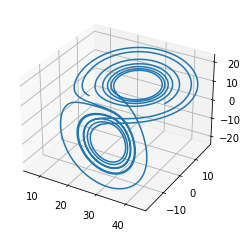

In [8]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy


def lorentz(x, y, z, xini, xfinal, steps, beta=8 / 3, sigma=10, rho=28):
    xstep = (xfinal - xini) / steps
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xl = [x]
    yl = [y]
    zl = [z]
    steps = int(steps)
    for step in range(steps):
        xi = copy.deepcopy(x)
        yi = copy.deepcopy(y)
        zi = copy.deepcopy(z)
        x = xi + xstep * (-beta * xi + yi * zi)
        y = yi + xstep * (-sigma * yi + sigma * zi)
        z = zi + xstep * (-yi * xi + rho * yi - zi)
        xl.append(x)
        yl.append(y)
        zl.append(z)
    ax.plot3D(xl, yl, zl)
    plt.show()


lorentz(x=12, y=4, z=0, xini=0, xfinal=10, steps=1e5)

## 额外三组结果

### $\beta=5,\sigma=12,\rho=30$

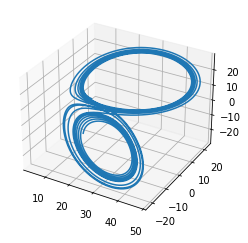

In [9]:
lorentz(x=12, y=4, z=0, xini=0, xfinal=10, steps=1e5, beta=5, sigma=12, rho=30)

### $\beta=1.5,\sigma=5,\rho=20$

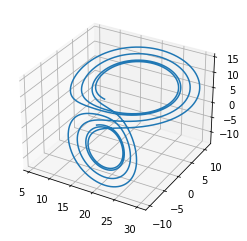

In [13]:
lorentz(x=12, y=4, z=0, xini=0, xfinal=10, steps=1e5, beta=1.5, sigma=5, rho=20)

### $\beta=5,\sigma=10,\rho=30$

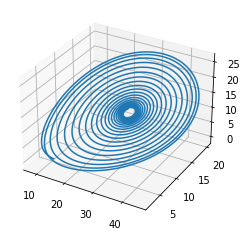

In [11]:
lorentz(x=12, y=4, z=0, xini=0, xfinal=10, steps=1e5, beta=5, sigma=10, rho=30)